<a href="https://colab.research.google.com/github/Ashwin2929/CE880_Case_Study/blob/main/CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study
# CE880: An Approachable Introduction to Data Science

# Predictive Modelling for Early Detection of Postpartum Depression

### Prepared by: Ashwin Purushothama Dhas (ap23710@essex.ac.uk)(2320993)

# ---------Learning Outcome---------

The main goal of this research is to develop a predictive model that leverages the selected attributes to estimate the likelihood of postpartum depression, as indicated by the target attribute "Feeling Anxious." By analyzing the relationship between the chosen attributes and the occurrence of postpartum depression, this case study aims to contribute valuable insights for early detection and intervention.

This analysis will involve exploring the dataset, performing data preprocessing and cleaning, conducting exploratory data analysis (EDA), and implementing a predictive modelling approach. Various machine learning algorithms, such as classification models, will be employed to build and evaluate the predictive model. The ultimate objective is to identify patterns, trends, and factors that may be indicative of postpartum depression based on the responses provided in the online survey.

# ---------Data Exploration---------

*   Load the data.
*   Explore the data.
*   Find missing values.
*   Impute missing values.
*   Summary statistics.


In [1]:
import pandas as pd

# Load data
dataset = pd.read_excel("data_PostNatal.xlsx")
df = pd.DataFrame(dataset)

# Head
print(df.head())

     Age Feeling sad or Tearful Irritable towards baby & partner  \
0  35-40                    Yes                              Yes   
1  40-45                    Yes                               No   
2  35-40                    Yes                               No   
3  35-40                    Yes                              Yes   
4  40-45                    Yes                               No   

  Trouble sleeping at night Problems concentrating or making decision  \
0   Two or more days a week                                       Yes   
1                        No                                       Yes   
2                       Yes                                       Yes   
3                       Yes                                       Yes   
4   Two or more days a week                                       Yes   

  Overeating or loss of appetite Feeling of guilt  \
0                            Yes               No   
1                            Yes              

The data is categorical data.
Categorical data consists of categories or labels that represent qualitative attributes, and there is no inherent order or numerical value associated with the categories.
In this case, each column represents a different categorical variable describing various symptoms or experiences, and each row represents a different individual's response to those variables.

In [2]:
df.shape

(1503, 10)

In [3]:
import missingno as msno

# Find any missing values
df.isnull().sum()

Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
Feeling anxious                               0
dtype: int64

For categorical data, it's more appropriate to use the mode to fill missing values, regardless of whether the data follows a normal distribution or not. The mode represents the most frequently occurring value in the dataset, which is a suitable measure of central tendency for categorical variables.



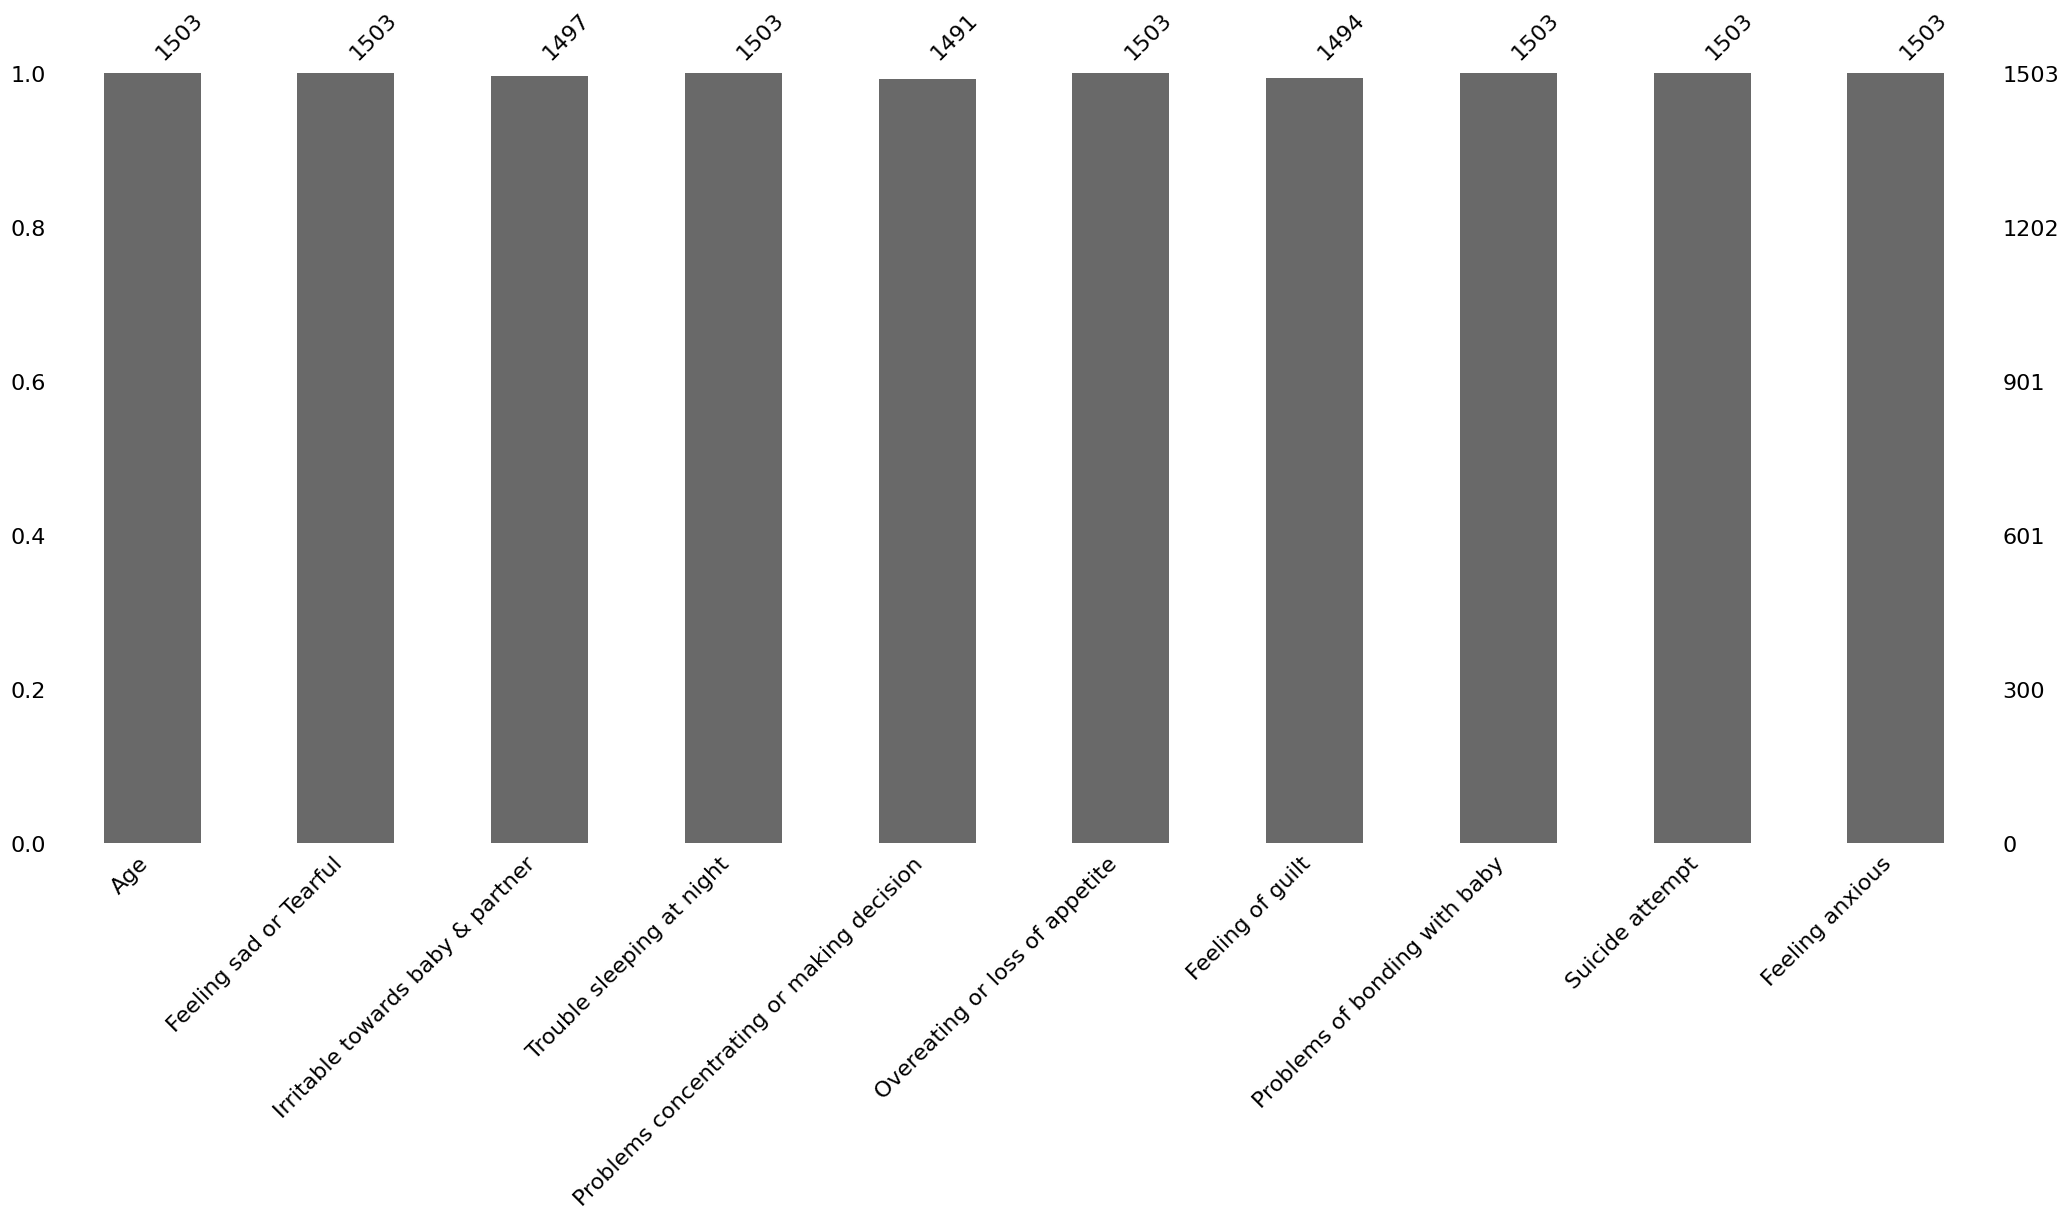

In [4]:
# plot graph for missing values
plot = msno.bar(df)

In [5]:
# Impute missing values with mode
for column in df.columns:
    mode_val = df[column].mode()[0]  # Calculate mode
    df[column].fillna(mode_val, inplace=True)
df.isnull().sum()

Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Feeling of guilt                             0
Problems of bonding with baby                0
Suicide attempt                              0
Feeling anxious                              0
dtype: int64

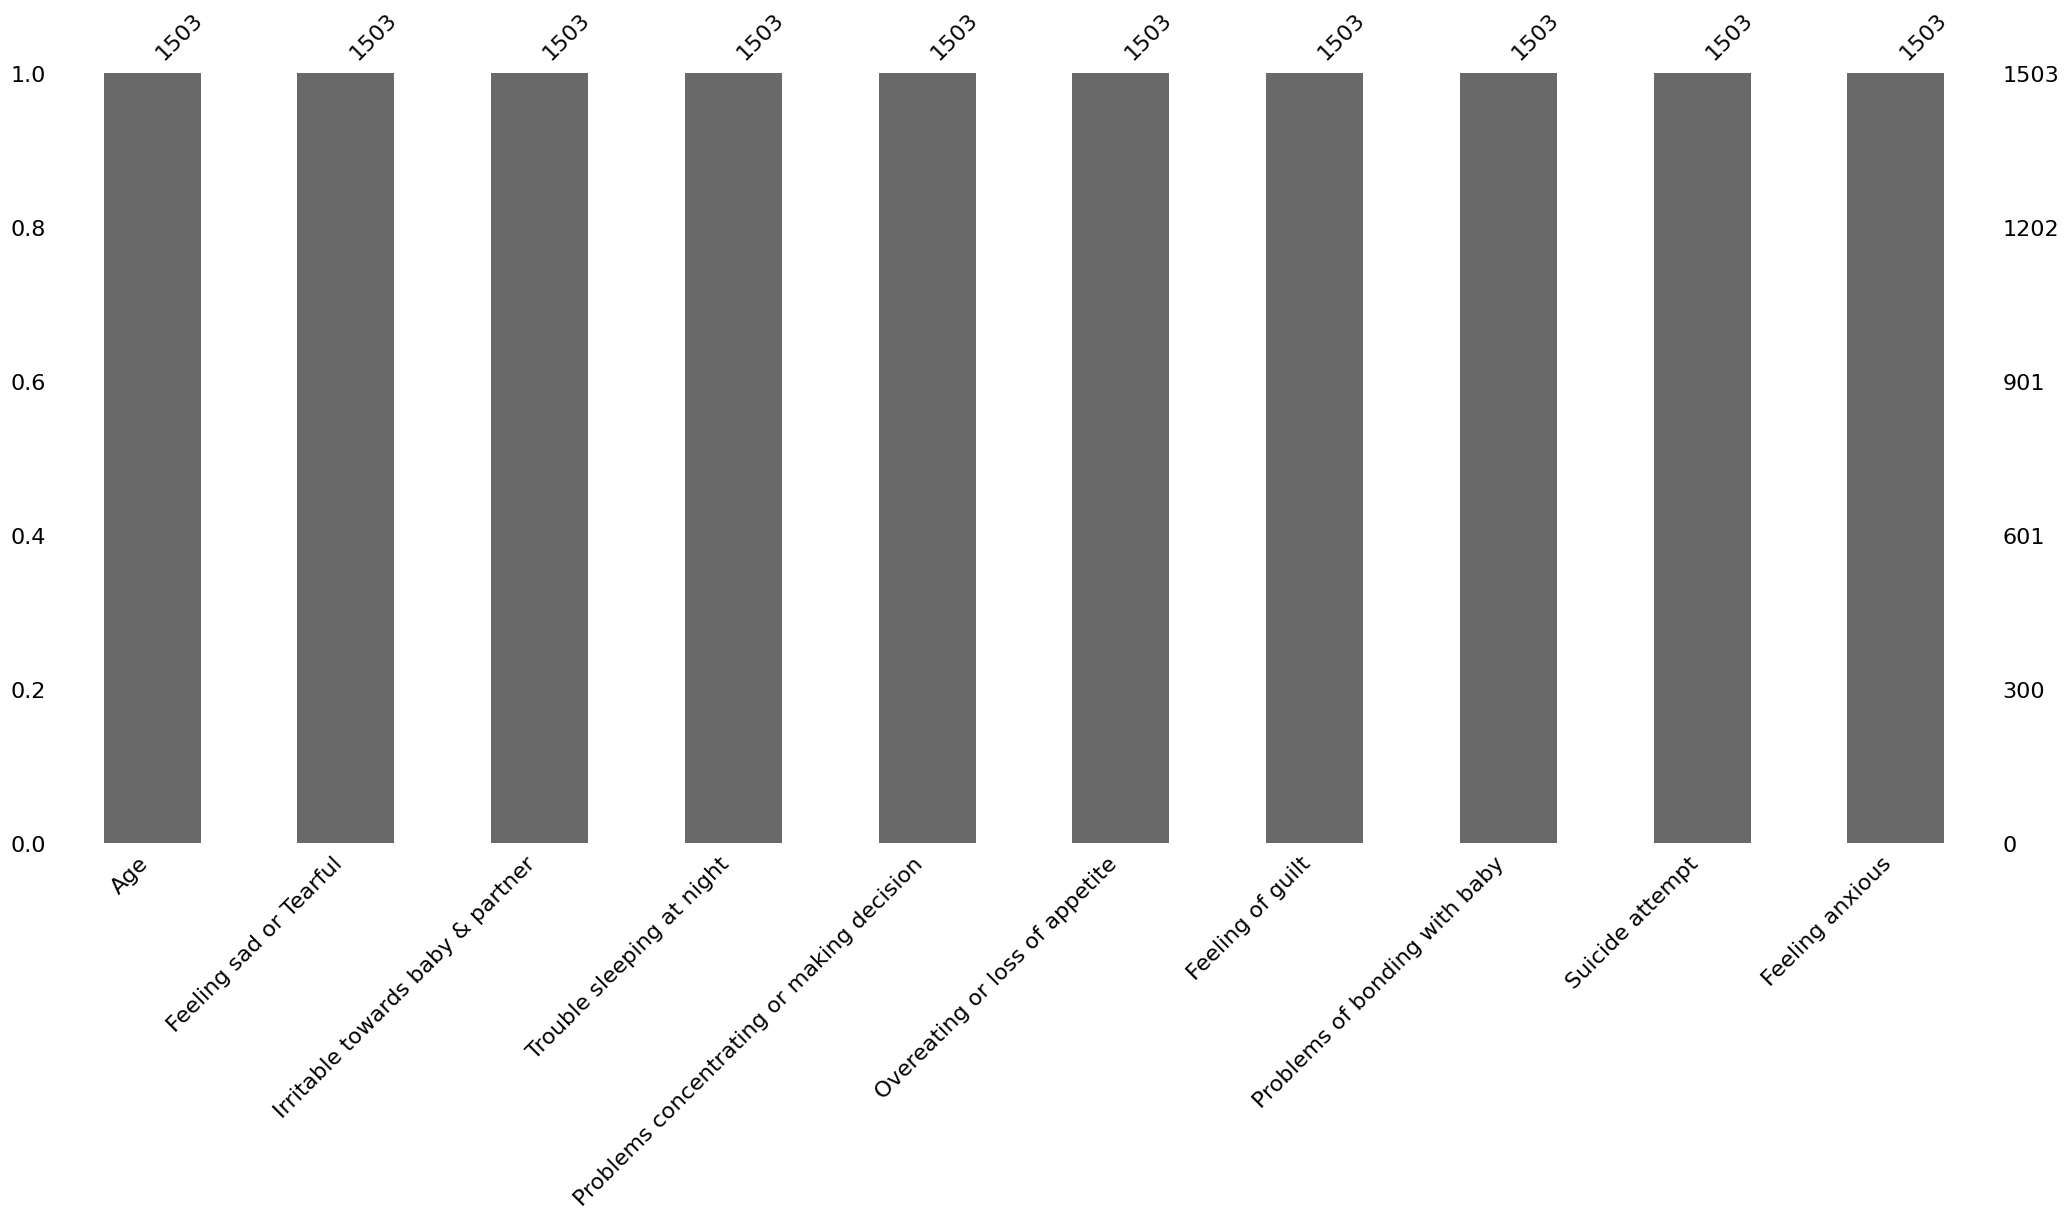

In [6]:
# plot graph to check imputed missing values
plot = msno.bar(df)

In [7]:
# Summary statistics
print("Summary Statistics:")
print(df.describe().T)

Summary Statistics:
                                          count unique  \
Age                                        1503      5   
Feeling sad or Tearful                     1503      3   
Irritable towards baby & partner           1503      3   
Trouble sleeping at night                  1503      3   
Problems concentrating or making decision  1503      3   
Overeating or loss of appetite             1503      3   
Feeling of guilt                           1503      3   
Problems of bonding with baby              1503      3   
Suicide attempt                            1503      3   
Feeling anxious                            1503      2   

                                                               top freq  
Age                                                          40-45  364  
Feeling sad or Tearful                                         Yes  536  
Irritable towards baby & partner                               Yes  561  
Trouble sleeping at night                  Tw

# ---------Data Visualisation---------



*   Pie chart - Distribution of each column
*   Bar chart - Relationship between 'Feeling anxious' column vs other columns



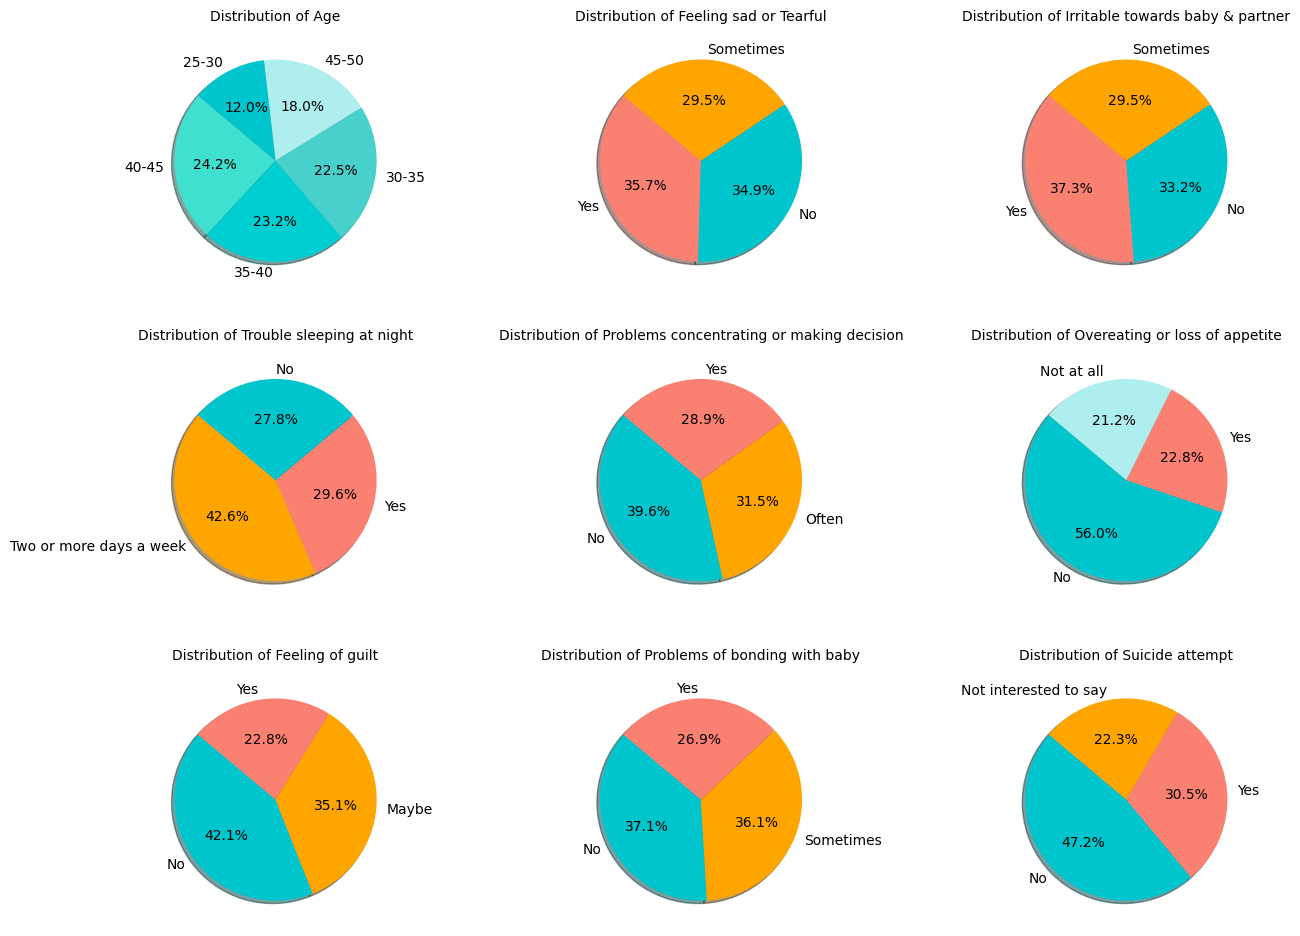

In [8]:
from matplotlib import pyplot as plt

# Visualize distribution of each column
color_map = {
    'No': '#00C5CD',
    'Not at all': '#AFEEEE',
    'Yes': '#FA8072',
    'Sometimes': '#FFA500',
    'Two or more days a week': '#FFA500',
    'Maybe': '#FFA500',
    'Often': '#FFA500',
    'Not interested to say': '#FFA500',
    '25-30': '#00C5CD',
    '30-35': '#48D1CC',
    '35-40': '#00CED1',
    '40-45': '#40E0D0',
    '45-50': '#AFEEEE'
}
num_subplots = min(len(df.columns), 9)

plt.figure(figsize=(14, 10))

for i, col in enumerate(df.columns):
    if i < num_subplots:
        plt.subplot(3, 3, i + 1)
        labels = df[col].value_counts().index
        sizes = df[col].value_counts().values
        colors = [color_map[label] for label in labels]
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
        plt.title(f'Distribution of {col}', fontsize=10, pad=10)

plt.tight_layout(pad=3.0)
plt.show()

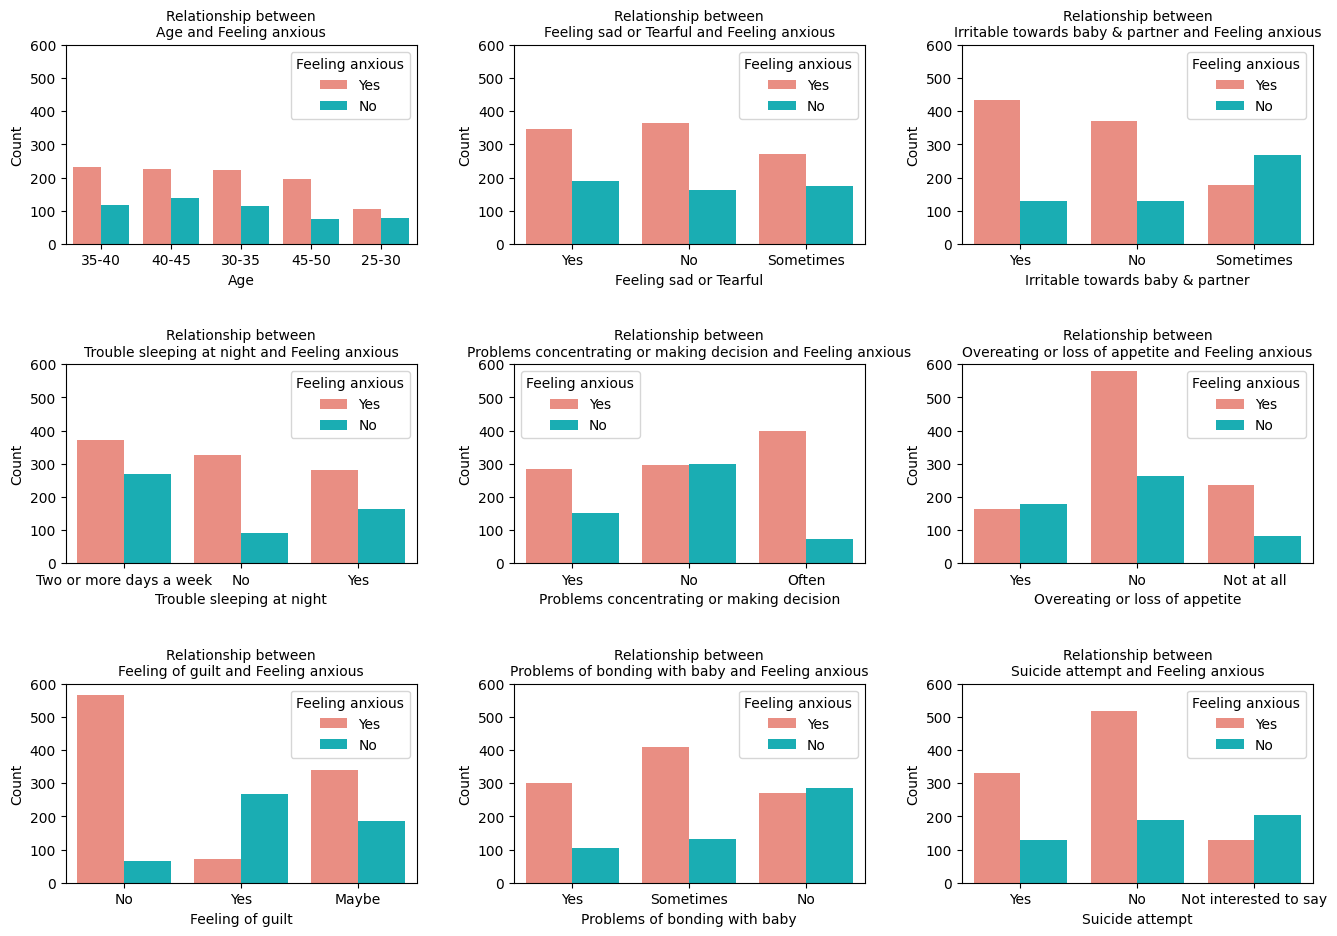

In [9]:
import seaborn as sns

# Visualize relationship between 'Feeling anxious' column vs each other columns
plt.figure(figsize=(14, 10))

num_subplots = min(len(df.columns) - 1, 9)

for i, column in enumerate(df.columns):
    if column != 'Feeling anxious' and i < num_subplots:
        plt.subplot(3, 3, i + 1)
        sns.countplot(data=df, x=column, hue='Feeling anxious', palette=color_map)
        plt.title(f'Relationship between\n{column} and Feeling anxious', fontsize=10)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.ylim(0, 600)  # Set y-axis limits
        plt.tight_layout(pad=3.0)

plt.show()

Age 30-50: The age range of 30-50 years old may indicate a higher likelihood of experiencing postpartum depression. This age group may face unique challenges and stressors associated with parenting, career, or other life circumstances.

Irritable towards baby & partner - Yes: Feeling irritable towards the baby and partner can be a significant indicator of postpartum depression. It may suggest difficulty in forming or maintaining positive relationships, which can contribute to feelings of isolation and distress.

Problems concentrating or making decision - Often: Difficulty concentrating or making decisions, especially when experienced frequently, can be a symptom of postpartum depression. Cognitive difficulties can impact daily functioning and exacerbate feelings of overwhelm and inadequacy.

Overeating or loss of appetite - No: While not experiencing overeating or loss of appetite may seem positive, it's essential to consider the context. Changes in eating habits, whether overeating or loss of appetite, can be symptoms of depression. Not experiencing these changes may indicate other coping mechanisms or avoidance behaviors.

Feeling of guilt - No: Similarly, not experiencing feelings of guilt may indicate a healthier psychological state. Feelings of guilt are common in postpartum depression and can stem from various sources, including perceived inadequacy as a parent or guilt over negative emotions towards the baby.

Problems of bonding with baby - Sometimes: Difficulty bonding with the baby, even if experienced only sometimes, can be a significant contributing factor to postpartum depression. Bonding issues can lead to feelings of detachment, guilt, and low self-esteem, further exacerbating depressive symptoms.

Suicide attempt - No: Not having a history of suicide attempts is a positive indicator but does not necessarily rule out the presence of postpartum depression. Suicide attempts are severe indicators of mental health distress and require immediate intervention and support.

# ---------Data Encoding---------

*   Encode data using one-hot Encoder.
*   Calculate variance to check multicollinearity problem.
*   Statistics for the encoded data





One-hot encoding is a technique used in machine learning to handle categorical data. Categorical data represents characteristics or attributes that have a finite set of possible values. These values don't have any numerical significance but are instead used to label a particular feature.

One-hot encoding transforms categorical variables into a format that can be provided to ML algorithms to improve predictive performance. Here's why it's often used:
1. Compatibility with ML algorithms.
2. Preserving information.
3. Avoiding ordinality assumptions.
4. Preventing bias.

In [10]:
# Encode categorical variables using one-hot encoding

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Drop the 'Feeling anxious' column
columns_to_encode = df.drop('Feeling anxious', axis=1).columns

# Initialize ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)])

# Fit and transform the data
encoded_data = ct.fit_transform(df)

# Convert the result back to a DataFrame
df_predictors_encoded = pd.DataFrame(encoded_data, columns=ct.get_feature_names_out())
df_target_encoded = df['Feeling anxious'].map({'Yes': 1, 'No': 0})

In [11]:
df_final = pd.concat([df_predictors_encoded, df_target_encoded], axis=1)
print(df_final.shape)
# print(df_final.describe())
# print(df_final.head())


(1503, 30)


Feeling anxious
0    523
1    980
dtype: int64


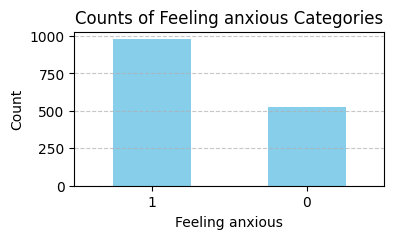

In [12]:
# class distribution
print(df_final.groupby('Feeling anxious').size())

# Plot graph
plt.figure(figsize=(4, 2))
df_final['Feeling anxious'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Counts of Feeling anxious Categories')
plt.xlabel('Feeling anxious')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This indicates that there is a significant portion of individuals in the dataset who report feeling anxious.

A correlation matrix heat map is a graphical representation of the correlation matrix, where the correlation coefficients between pairs of variables are visualized using colors. Each cell in the heat map represents the correlation coefficient between two variables, and the color intensity or shade indicates the strength and direction of the correlation.

Here are some common uses of a correlation matrix heat map:
1. Identifying Relationships.
2. Feature Selection.
3. Multicollinearity Detection.
4. Data Exploration and Understanding.

(30, 30)


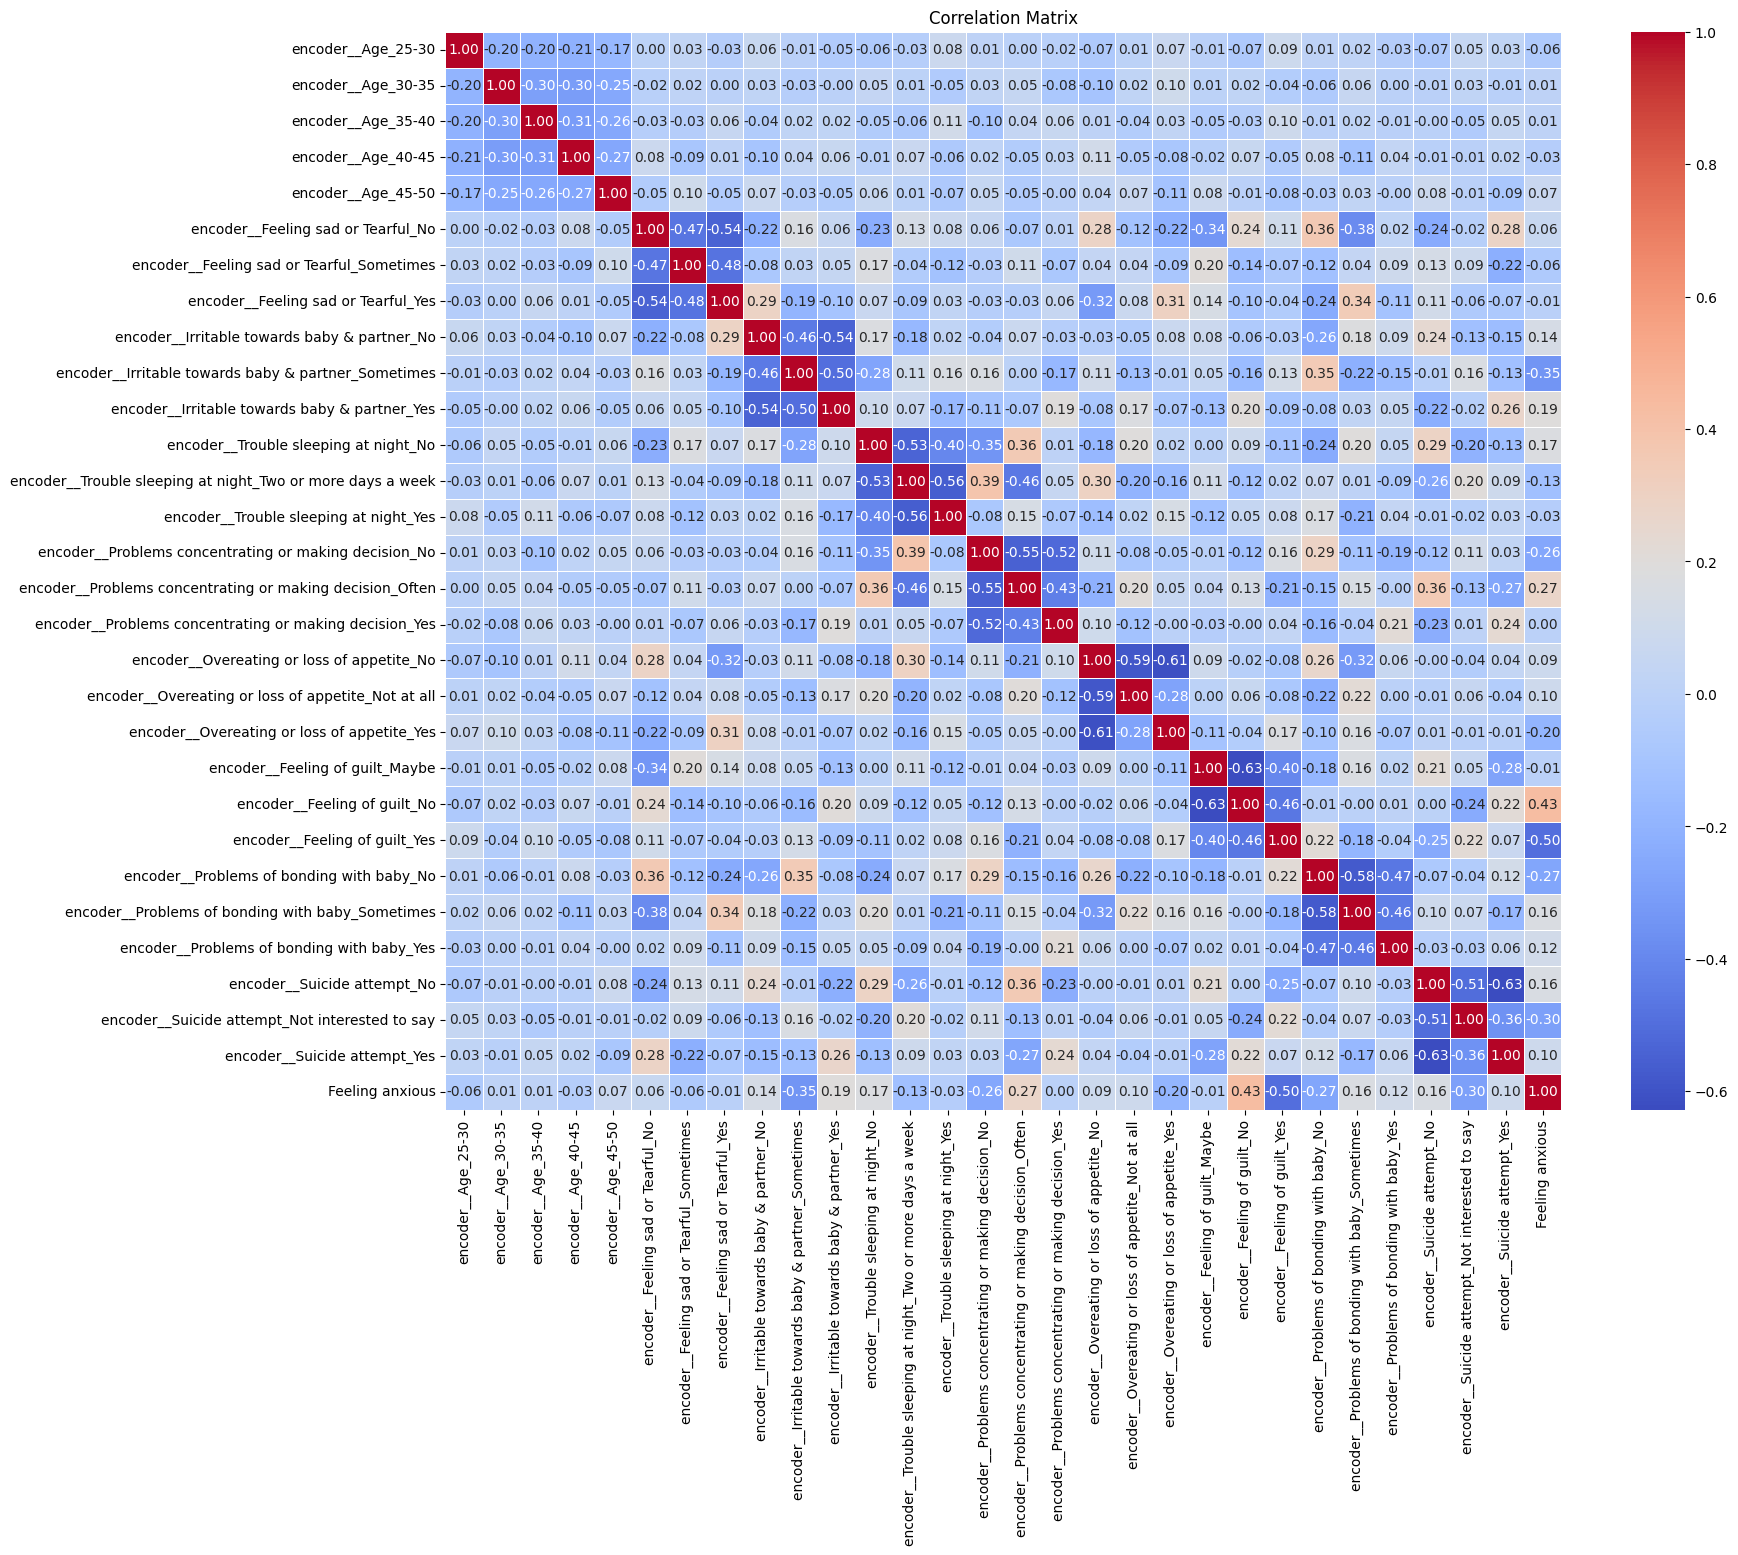

In [13]:
# Calculate the correlation matrix
correlation_matrix = df_final.corr()
print(correlation_matrix.shape)

# Plot the correlation matrix
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

VIF measures the extent to which the variance of an estimated regression coefficient is increased due to multicollinearity in the model. High VIF values indicate that a predictor variable is highly correlated with other predictor variables in the model.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF for the predictors
vif_results = calculate_vif(df_predictors_encoded)
print("VIF for each predictor:")
print(vif_results)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF for each predictor:
                                             Variable  VIF
0                                  encoder__Age_25-30  inf
1                                  encoder__Age_30-35  inf
2                                  encoder__Age_35-40  inf
3                                  encoder__Age_40-45  inf
4                                  encoder__Age_45-50  inf
5                  encoder__Feeling sad or Tearful_No  inf
6           encoder__Feeling sad or Tearful_Sometimes  inf
7                 encoder__Feeling sad or Tearful_Yes  inf
8        encoder__Irritable towards baby & partner_No  inf
9   encoder__Irritable towards baby & partner_Some...  inf
10      encoder__Irritable towards baby & partner_Yes  inf
11              encoder__Trouble sleeping at night_No  inf
12  encoder__Trouble sleeping at night_Two or more...  inf
13             encoder__Trouble sleeping at night_Yes  inf
14  encoder__Problems concentrating or making deci...  inf
15  encoder__Problems concentrat


In the above output, all VIF values are reported as "inf" (infinity), which indicates that there is perfect multicollinearity between the predictor variables. Perfect multicollinearity occurs when one or more predictor variables can be perfectly predicted by a linear combination of other predictor variables. This can lead to issues with estimation and interpretation of coefficients in regression models.

To address this issue, you may need to investigate and address the multicollinearity in your model. This can be done by:
1. Examining Correlation Matrix.
2. Removing Redundant Variables.
3. Regularization Techniques.
4. Combining Variables.

dropping columns ending with "_No" can be a valid preprocessing step depending on the context of your analysis and the nature of your data. Here are some considerations:

1. Binary Encoding: If the presence of a certain condition or attribute is represented by the absence of "_No", and you're planning to encode these attributes as binary variables (0 for absence, 1 for presence), then dropping "_No" columns could be appropriate. In this case, the information about the presence or absence of the attribute is already captured in the remaining columns.

2. Multicollinearity: Keeping both the binary columns representing presence and absence of a certain attribute can lead to multicollinearity issues, as the two columns will be perfectly negatively correlated. This can affect the stability and interpretability of your model. Dropping one of the columns can mitigate this issue.



Filter out columns that has less contribution to postpartum depression and also to reduce VIF

In [15]:
# Filter out columns that has less contribution to postpartum depression
df_final = df_final.drop(columns=['encoder__Age_25-30'])
df_final = df_final.drop(columns=['encoder__Irritable towards baby & partner_Sometimes'])
df_final = df_final.drop(columns=['encoder__Overeating or loss of appetite_Yes'])
df_final = df_final.drop(columns=['encoder__Feeling of guilt_Yes'])
df_final = df_final.drop(columns=['encoder__Suicide attempt_Not interested to say'])
df_final = df_final.drop(columns=['encoder__Feeling sad or Tearful_Sometimes'])
df_final = df_final.drop(columns=['encoder__Trouble sleeping at night_Yes'])
df_final = df_final.drop(columns=['encoder__Problems concentrating or making decision_No'])
df_final = df_final.drop(columns=['encoder__Problems of bonding with baby_No'])


# Drop the target column 'Feeling anxious'
df_filtered = df_final.drop(columns=['Feeling anxious'])
df_target_encoded = df['Feeling anxious'].map({'Yes': 1, 'No': 0})
print(df_filtered.columns)

Index(['encoder__Age_30-35', 'encoder__Age_35-40', 'encoder__Age_40-45',
       'encoder__Age_45-50', 'encoder__Feeling sad or Tearful_No',
       'encoder__Feeling sad or Tearful_Yes',
       'encoder__Irritable towards baby & partner_No',
       'encoder__Irritable towards baby & partner_Yes',
       'encoder__Trouble sleeping at night_No',
       'encoder__Trouble sleeping at night_Two or more days a week',
       'encoder__Problems concentrating or making decision_Often',
       'encoder__Problems concentrating or making decision_Yes',
       'encoder__Overeating or loss of appetite_No',
       'encoder__Overeating or loss of appetite_Not at all',
       'encoder__Feeling of guilt_Maybe', 'encoder__Feeling of guilt_No',
       'encoder__Problems of bonding with baby_Sometimes',
       'encoder__Problems of bonding with baby_Yes',
       'encoder__Suicide attempt_No', 'encoder__Suicide attempt_Yes'],
      dtype='object')


(20, 20)


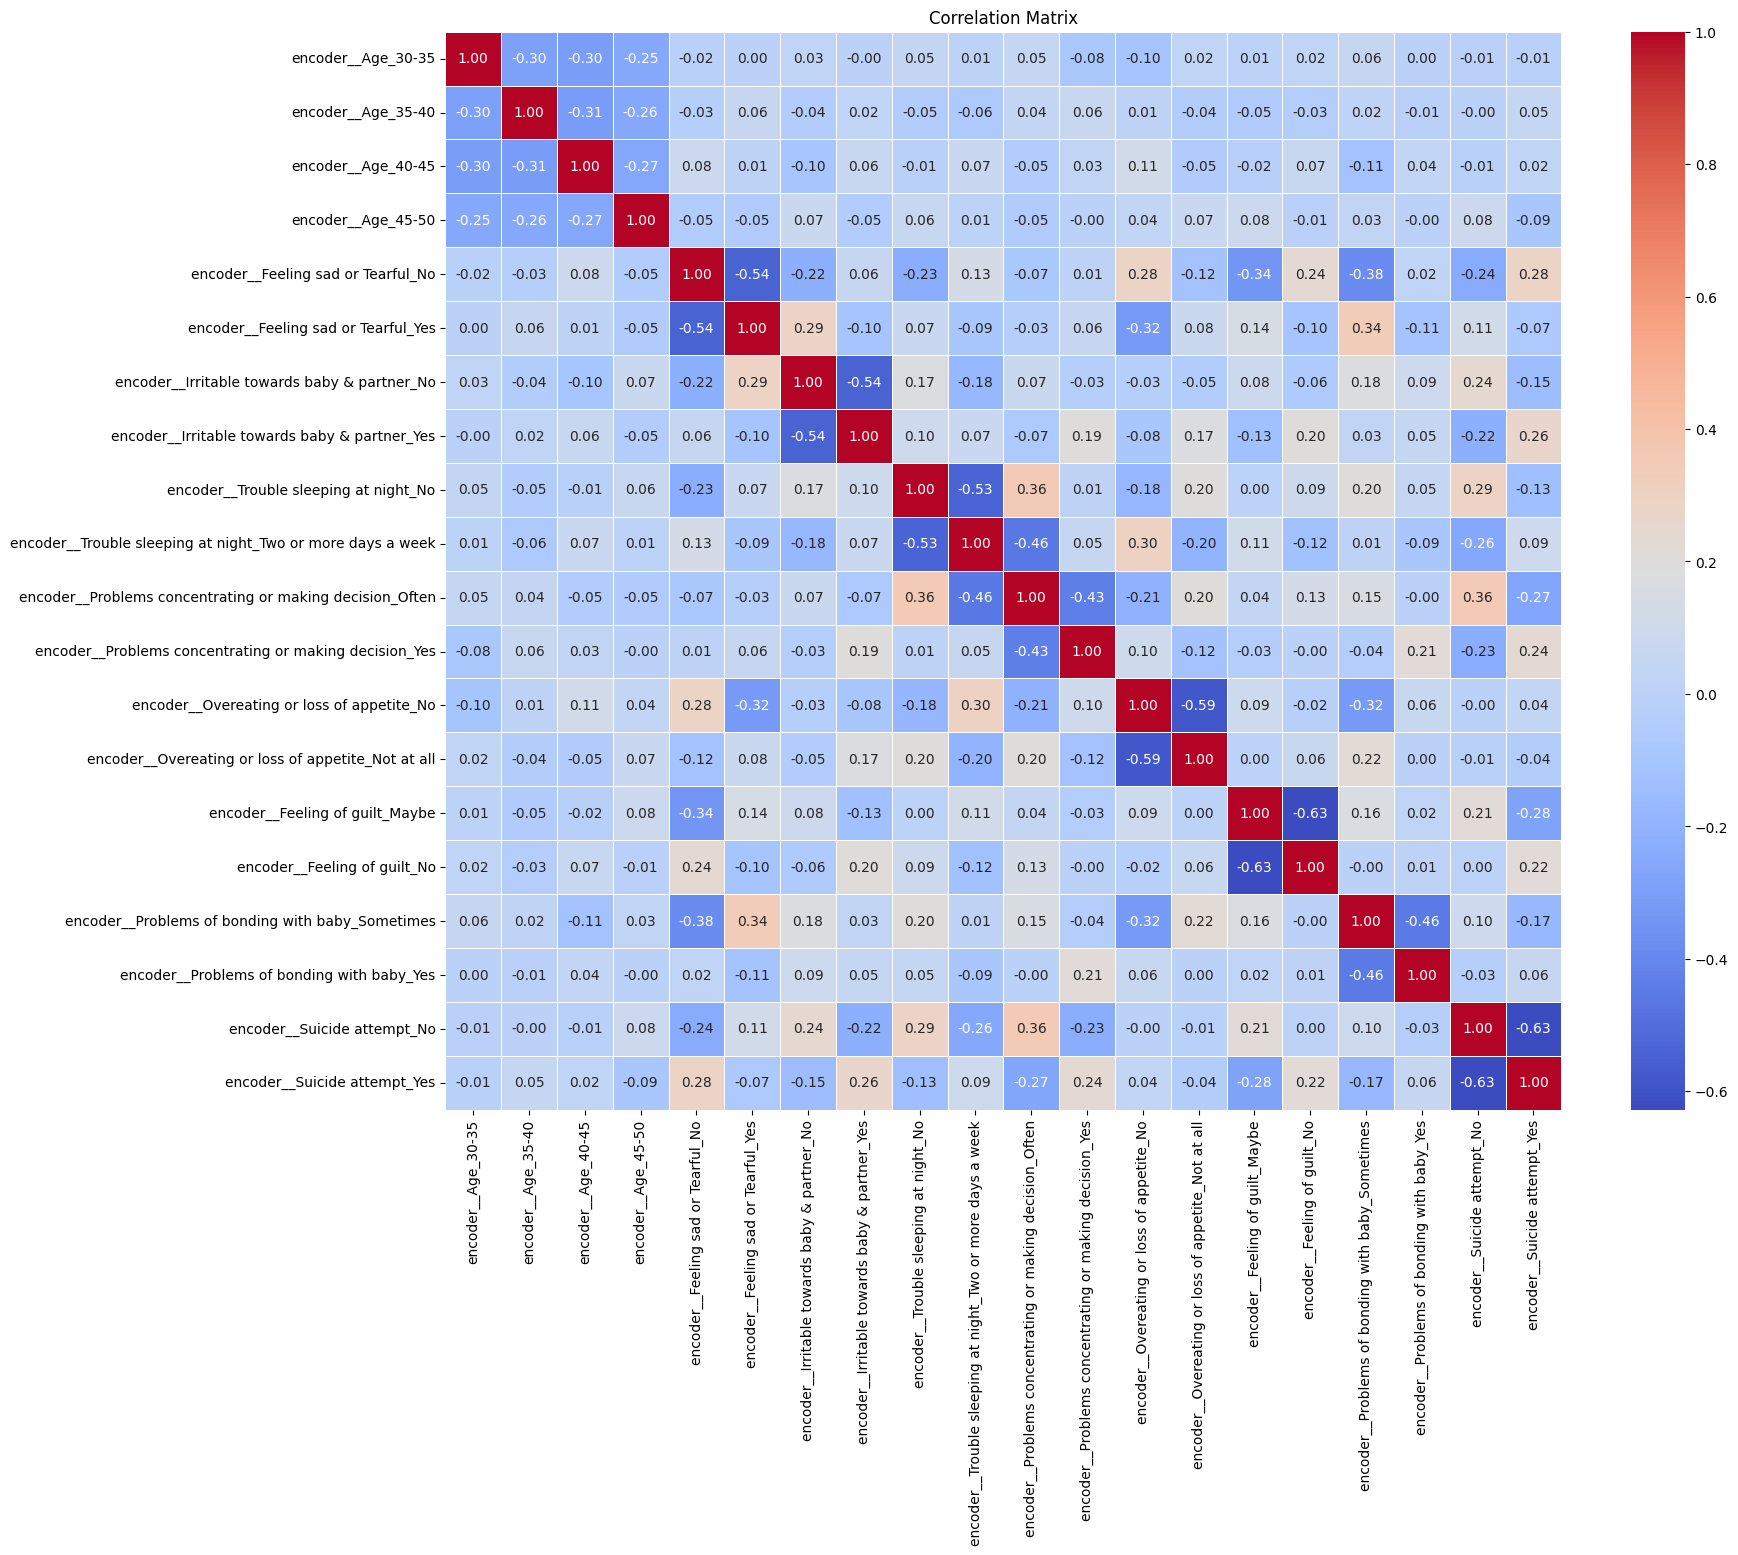

In [16]:
# Calculate the correlation matrix
correlation_matrix = df_filtered.corr()
print(correlation_matrix.shape)

# Plot the correlation matrix
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Here's a breakdown of the VIF values for each predictor:

Low VIF (VIF < 5): These predictors have low multicollinearity with other predictors and are generally considered acceptable.

Moderate VIF (5 ≤ VIF < 10): These predictors may have some multicollinearity but are usually acceptable for most analyses.

High VIF (VIF ≥ 10): These predictors exhibit high multicollinearity with other predictors and may cause issues in the analysis.

In [17]:
# Calculate VIF for each predictor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF for the predictors
vif_results = calculate_vif(df_filtered)
print("VIF for each predictor:")
print(vif_results)

VIF for each predictor:
                                             Variable       VIF
0                                  encoder__Age_30-35  2.381631
1                                  encoder__Age_35-40  2.475205
2                                  encoder__Age_40-45  2.704720
3                                  encoder__Age_45-50  2.205396
4                  encoder__Feeling sad or Tearful_No  2.652706
5                 encoder__Feeling sad or Tearful_Yes  2.524769
6        encoder__Irritable towards baby & partner_No  2.776752
7       encoder__Irritable towards baby & partner_Yes  2.881489
8               encoder__Trouble sleeping at night_No  2.436868
9   encoder__Trouble sleeping at night_Two or more...  3.144660
10  encoder__Problems concentrating or making deci...  2.693727
11  encoder__Problems concentrating or making deci...  2.087468
12         encoder__Overeating or loss of appetite_No  4.421207
13  encoder__Overeating or loss of appetite_Not at...  2.024883
14              

Based on the above VIF values:

Most of the predictor variables have VIF values below 5, indicating low to moderate multicollinearity.
Variable such as 'encoder__Overeating or loss of appetite_No' has slightly higher VIF values but are still below 5, suggesting moderate multicollinearity.
The variables related to 'Feeling sad or Tearful' and 'Irritable towards baby & partner' have VIF values close to 2, indicating relatively low multicollinearity.

Scaling the data is a preprocessing step that involves transforming the features of your dataset to have a similar scale or range.
1. Improving Convergence.
2. Avoiding Dominance of Features.
3. Ensuring Fair Comparison.
4. Regularization.

Standard Scaler formula:

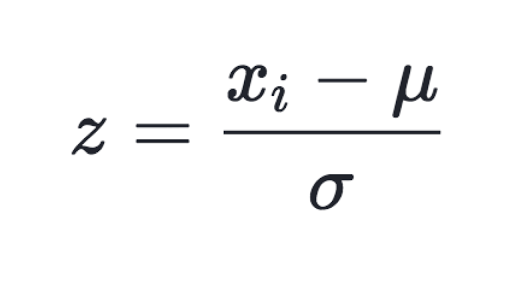

In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
scaled_data = scaler.fit_transform(df_filtered)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df_filtered.columns)

# Display the scaled DataFrame
df_scaled.head()

,encoder__Age_30-35,encoder__Age_35-40,encoder__Age_40-45,encoder__Age_45-50,encoder__Feeling sad or Tearful_No,encoder__Feeling sad or Tearful_Yes,encoder__Irritable towards baby & partner_No,encoder__Irritable towards baby & partner_Yes,encoder__Trouble sleeping at night_No,encoder__Trouble sleeping at night_Two or more days a week,encoder__Problems concentrating or making decision_Often,encoder__Problems concentrating or making decision_Yes,encoder__Overeating or loss of appetite_No,encoder__Overeating or loss of appetite_Not at all,encoder__Feeling of guilt_Maybe,encoder__Feeling of guilt_No,encoder__Problems of bonding with baby_Sometimes,encoder__Problems of bonding with baby_Yes,encoder__Suicide attempt_No,encoder__Suicide attempt_Yes
0,-0.538636,1.818403,-0.565313,-0.469007,-0.731601,1.34317,-0.704991,1.295818,-0.620688,1.161222,-0.67766,1.566899,-1.127117,-0.519062,-0.735893,1.172351,-0.750997,1.649332,-0.944959,1.508148
1,-0.538636,-0.549933,1.768932,-0.469007,-0.731601,1.34317,1.418458,-0.771713,1.611116,-0.861161,-0.67766,1.566899,-1.127117,-0.519062,-0.735893,-0.852987,-0.750997,1.649332,1.058247,-0.663065
2,-0.538636,1.818403,-0.565313,-0.469007,-0.731601,1.34317,1.418458,-0.771713,-0.620688,-0.861161,-0.67766,1.566899,-1.127117,-0.519062,-0.735893,1.172351,1.331564,-0.606306,1.058247,-0.663065
3,-0.538636,1.818403,-0.565313,-0.469007,-0.731601,1.34317,-0.704991,1.295818,-0.620688,-0.861161,-0.67766,1.566899,0.887219,-0.519062,1.358893,-0.852987,-0.750997,-0.606306,1.058247,-0.663065
4,-0.538636,-0.549933,1.768932,-0.469007,-0.731601,1.34317,1.418458,-0.771713,-0.620688,1.161222,-0.67766,1.566899,0.887219,-0.519062,-0.735893,1.172351,-0.750997,1.649332,1.058247,-0.663065


Data Splitting.

The dataset will be split into training, validation, and test sets with proportions of 60%, 20%, and 20%, respectively.

In [19]:
from sklearn.model_selection import train_test_split

# splitting of scaled data - KNN, SVC, Logistic Regression, Deep Learning model.
X = df_scaled
y = df_final['Feeling anxious']

# Splitting data into training, validation, and test sets
X_train_scaled, X_temp, y_train_scaled, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)
X_val_scaled, X_test_scaled, y_val_scaled, y_test_scaled = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

# splitting of unscaled data - XG-Boost, Random Forest.
X = df_filtered
y = df_final['Feeling anxious']

# Splitting data into training, validation, and test sets
X_train_filtered, X_temp, y_train_filtered, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)
X_val_filtered, X_test_filtered, y_val_filtered, y_test_filtered = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)


# ---------Classifications---------



*   KNN
*   SVC
*   Logistic Regression
*   XG-Boost
*   Random Forest
*   Deep Learning













Algorithms that Require Standardization: Some machine learning algorithms, such as logistic regression, support vector machines (SVMs), and k-nearest neighbors (KNN), perform better when features are standardized. Standardization can help algorithms converge faster and make them less sensitive to the scale of features.

Algorithms that Do Not Require Standardization: Other algorithms, such as decision trees, random forests, and gradient boosting machines (GBMs), are not sensitive to feature scale and do not require standardization. These algorithms use splitting criteria that are invariant to monotonic transformations of individual features, so standardization is unnecessary.

**Precision**: Reflects the proportion of correctly identified instances among the total predicted instances. Higher precision indicates fewer false positives.

**Recall**: Reflects the proportion of correctly identified instances among the total actual instances. Higher recall indicates fewer false negatives.

**F1-score**: The harmonic mean of precision and recall. It provides a balance between precision and recall, with higher values indicating better overall performance.

In [20]:
# Accuracies
accuracies = []

K-Nearest Neighbors (KNN)

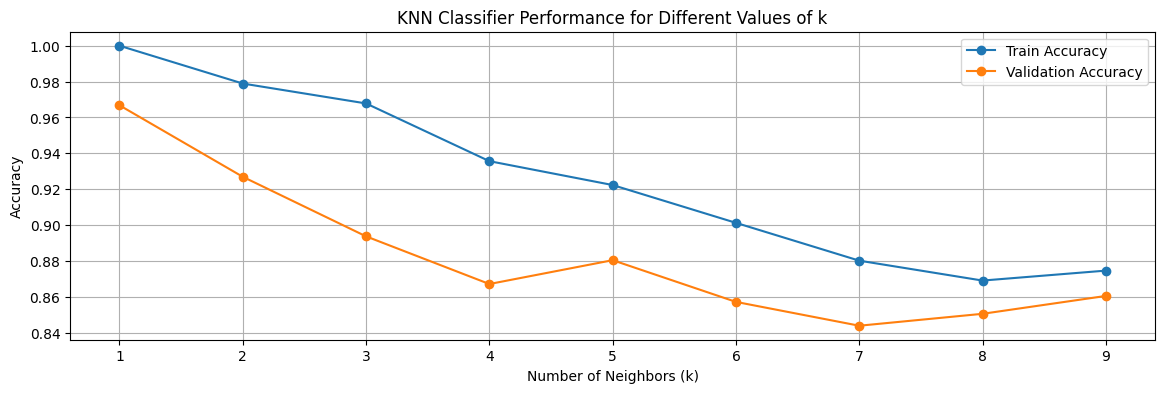


Best Validation Accuracy: 0.9667774086378738
Best Value of k: 1



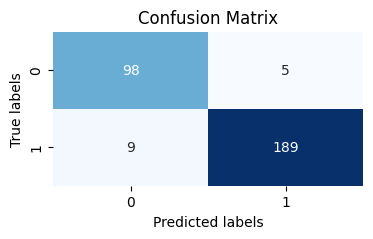


              precision    recall  f1-score   support

           0       0.92      0.95      0.93       103
           1       0.97      0.95      0.96       198

    accuracy                           0.95       301
   macro avg       0.95      0.95      0.95       301
weighted avg       0.95      0.95      0.95       301

KNN Accuracy: 0.95

Top 5 Significant Predictors for KNN:
Index(['encoder__Problems concentrating or making decision_Yes',
       'encoder__Overeating or loss of appetite_Not at all',
       'encoder__Problems of bonding with baby_Sometimes',
       'encoder__Feeling of guilt_Maybe',
       'encoder__Feeling sad or Tearful_Yes'],
      dtype='object')


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
import numpy as np

# Initialize lists to store training and testing accuracies for different k values
train_scores = []
test_scores = []

# Define range of k values to test
k_values = range(1, 10)

X_train, y_train, X_val, y_val, X_test, y_test = X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, X_test_scaled, y_test_scaled

# Initialize variables to store best accuracy and best k
best_accuracy = 0
best_k = 0

# Loop over different values of k
for k in k_values:
    # Initialize KNN classifier with current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit KNN classifier to training data
    knn.fit(X_train, y_train)

    # Predict y data with classifier
    y_predict_train = knn.predict(X_train)
    y_predict_val = knn.predict(X_val)

    # Calculate accuracy for training and validation datasets
    train_accuracy = accuracy_score(y_train, y_predict_train)
    val_accuracy = accuracy_score(y_val, y_predict_val)

    # Store accuracy scores for current k value
    train_scores.append(train_accuracy)
    test_scores.append(val_accuracy)

    # Check if current validation accuracy is the best so far
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_k = k

# Plotting the accuracy scores for different k values
plt.figure(figsize=(14, 4))
plt.plot(k_values, train_scores, marker='o', label='Train Accuracy')
plt.plot(k_values, test_scores, marker='o', label='Validation Accuracy')
plt.title('KNN Classifier Performance for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()
print()

# Print the best accuracy and best k
print("Best Validation Accuracy:", best_accuracy)
print("Best Value of k:", best_k)
print()

# Use the KNN classifier with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Predict y data with classifier
y_predict_test = best_knn.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_predict_test)

# Plot confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print()

# Print classification report
print(classification_report(y_test, y_predict_test))

# Print accuracy
accuracy_knn = accuracy_score(y_test, y_predict_test)
print("KNN Accuracy: {:.2f}".format(accuracy_knn))

# Calculate feature importance scores using permutation importance
knn_perm_importance = permutation_importance(best_knn, X_test, y_test, n_repeats=30, random_state=42)

# Get feature importance scores and indices
knn_importance_scores = knn_perm_importance.importances_mean
knn_feature_indices = np.argsort(knn_importance_scores)[::-1]

# Get top significant predictors
top_knn_predictors = X_test.columns[knn_feature_indices][:5]

# Print top significant predictors
print()
print("Top 5 Significant Predictors for KNN:")
print(top_knn_predictors)

# Append accuracy to accuracies list
accuracies.append(round(accuracy_knn, 2))

SVC (Support Vector Classification)

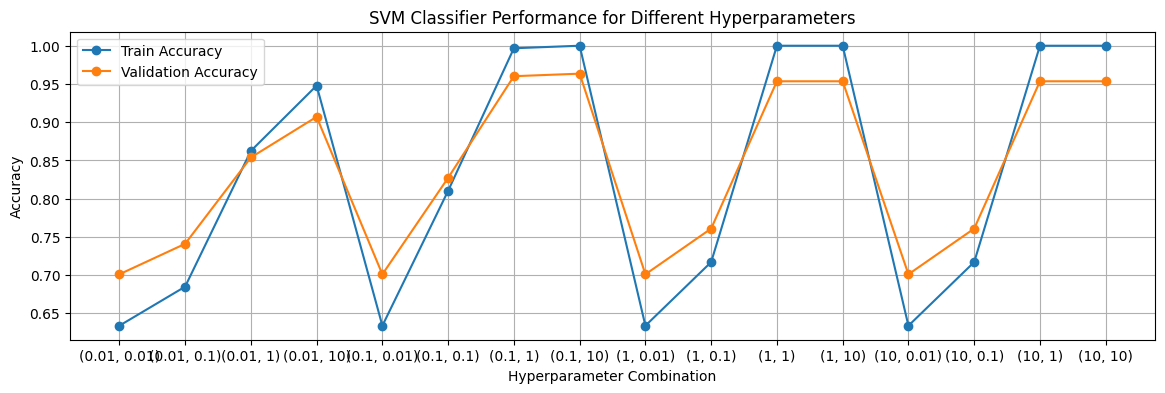


Best Validation Accuracy: 0.9634551495016611
Best Hyperparameters (gamma, C): (0.1, 10)



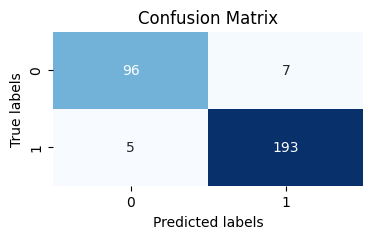


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       103
           1       0.96      0.97      0.97       198

    accuracy                           0.96       301
   macro avg       0.96      0.95      0.96       301
weighted avg       0.96      0.96      0.96       301

SVC Accuracy: 0.96

Top 5 Significant Predictors for SVC:
Index(['encoder__Feeling of guilt_No',
       'encoder__Problems of bonding with baby_Sometimes',
       'encoder__Feeling of guilt_Maybe',
       'encoder__Problems concentrating or making decision_Yes',
       'encoder__Overeating or loss of appetite_Not at all'],
      dtype='object')


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import numpy as np

# Initialize lists to store training and testing accuracies for different hyperparameters
train_scores = []
test_scores = []

X_train, y_train, X_val, y_val, X_test, y_test = X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, X_test_scaled, y_test_scaled

# Define range of hyperparameters to test
gamma_values = [0.01, 0.1, 1, 10]
C_values = [0.01, 0.1, 1, 10]

# Initialize variables to store best accuracy and best hyperparameters
best_accuracy = 0
best_gamma = 0
best_C = 0

# Loop over different values of gamma and C
for gamma in gamma_values:
    for C in C_values:
        # Initialize SVM classifier with current hyperparameters
        svc = SVC(kernel='rbf', random_state=42, gamma=gamma, C=C)

        # Fit SVM classifier to training data
        svc.fit(X_train, y_train)

        # Predict y data with classifier
        y_predict_train = svc.predict(X_train)
        y_predict_val = svc.predict(X_val)

        # Calculate accuracy for training and validation datasets
        train_accuracy = accuracy_score(y_train, y_predict_train)
        val_accuracy = accuracy_score(y_val, y_predict_val)

        # Store accuracy scores for current hyperparameter combination
        train_scores.append(train_accuracy)
        test_scores.append(val_accuracy)

        # Check if current validation accuracy is the best so far
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_gamma = gamma
            best_C = C

# Plotting the accuracy scores for different hyperparameter combinations
plt.figure(figsize=(14, 4))
plt.plot(range(len(gamma_values) * len(C_values)), train_scores, marker='o', label='Train Accuracy')
plt.plot(range(len(gamma_values) * len(C_values)), test_scores, marker='o', label='Validation Accuracy')
plt.title('SVM Classifier Performance for Different Hyperparameters')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Accuracy')
plt.xticks(range(len(gamma_values) * len(C_values)), [(gamma, C) for gamma in gamma_values for C in C_values])
plt.legend()
plt.grid(True)
plt.show()

# Print the best accuracy and best hyperparameters
print()
print("Best Validation Accuracy:", best_accuracy)
print("Best Hyperparameters (gamma, C):", (best_gamma, best_C))
print()

# Initialize SVM classifier with the best hyperparameters
best_svc = SVC(kernel='rbf', random_state=42, gamma=best_gamma, C=best_C)

# Fit SVM classifier to training data
best_svc.fit(X_train, y_train)

# Predict y data with classifier
y_predict_test = best_svc.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_predict_test)

# Plot confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print()

# Print classification report
print(classification_report(y_test, y_predict_test))

# Print accuracy
accuracy_svc = accuracy_score(y_test, y_predict_test)
print("SVC Accuracy: {:.2f}".format(accuracy_svc))

# Calculate feature importance scores using permutation importance
svc_perm_importance = permutation_importance(best_svc, X_test, y_test, n_repeats=30, random_state=42)

# Get feature importance scores and indices
svc_importance_scores = svc_perm_importance.importances_mean
svc_feature_indices = np.argsort(svc_importance_scores)[::-1]

# Get top significant predictors
top_svc_predictors = X_test.columns[svc_feature_indices][:5]

# Print top significant predictors
print()
print("Top 5 Significant Predictors for SVC:")
print(top_svc_predictors)

# Append accuracy to accuracies list
accuracies.append(round(accuracy_svc, 2))

Logistic Regression

Best Parameters: learning_rate = 0.01



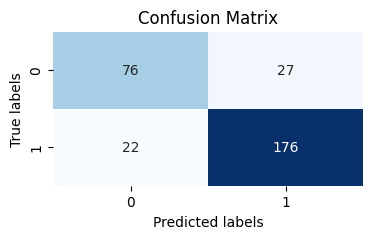


              precision    recall  f1-score   support

           0       0.78      0.74      0.76       103
           1       0.87      0.89      0.88       198

    accuracy                           0.84       301
   macro avg       0.82      0.81      0.82       301
weighted avg       0.84      0.84      0.84       301

Logistic Regression Accuracy: 0.87


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train, y_train, X_val, y_val, X_test, y_test = X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, X_test_scaled, y_test_scaled

learning_rate = 0.01

print("Best Parameters: learning_rate =", learning_rate)
print()

# Train logistic regression classifier
log_reg = LogisticRegression(C=1/learning_rate, random_state=42)  # Inverse of the learning rate is used as regularization strength
log_reg.fit(X_train, y_train)

# Predict y data with classifier
y_predict_log_reg = log_reg.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_predict_log_reg)

# Plot confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print()

# Print classification report
print(classification_report(y_test, y_predict_log_reg))

# Calculate and print accuracy
y_val_predict_log_reg = log_reg.predict(X_val)
accuracy_val_log_reg = accuracy_score(y_val, y_val_predict_log_reg)
print("Logistic Regression Accuracy: {:.2f}".format(accuracy_val_log_reg))

# Append accuracy to accuracies list
accuracies.append(round(accuracy_val_log_reg, 2))


XG-Boost

Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}



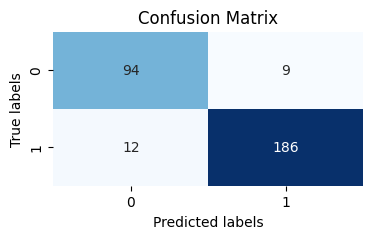


              precision    recall  f1-score   support

           0       0.89      0.91      0.90       103
           1       0.95      0.94      0.95       198

    accuracy                           0.93       301
   macro avg       0.92      0.93      0.92       301
weighted avg       0.93      0.93      0.93       301

XG-Boost Accuracy: 0.96


In [24]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train, y_train, X_val, y_val, X_test, y_test = X_train_filtered, y_train_filtered, X_val_filtered, y_val_filtered, X_test_filtered, y_test_filtered

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
}

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print()

# Use the best parameters to initialize XGBoost classifier
best_xgb_classifier = xgb.XGBClassifier(**grid_search.best_params_)

# Train the XGBoost classifier with the best parameters
best_xgb_classifier.fit(X_train, y_train)

# Predict y data with classifier
y_predict_xgb = best_xgb_classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_predict_xgb)

# Plot confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print()

# Print classification report
print(classification_report(y_test, y_predict_xgb))

# evaluation using the validation set
y_val_predict_xgb = best_xgb_classifier.predict(X_val)
accuracy_val_xgb = accuracy_score(y_val, y_val_predict_xgb)
print("XG-Boost Accuracy: {:.2f}".format(accuracy_val_xgb))

# Append accuracy to accuracies list
accuracies.append(round(accuracy_val_xgb, 2))

Random Forest


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}



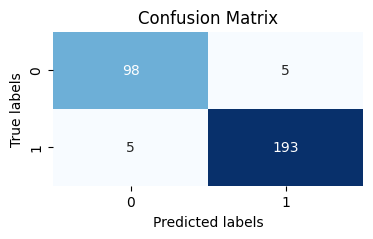


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       103
           1       0.97      0.97      0.97       198

    accuracy                           0.97       301
   macro avg       0.96      0.96      0.96       301
weighted avg       0.97      0.97      0.97       301

Random Forest Accuracy: 0.96


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train, y_train, X_val, y_val, X_test, y_test = X_train_filtered, y_train_filtered, X_val_filtered, y_val_filtered, X_test_filtered, y_test_filtered

# Define Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid to search for the best parameters
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print()
print("Best Parameters:", grid_search.best_params_)
print()

# Train Random Forest classifier with the best parameters
rf_classifier_best = RandomForestClassifier(**best_params, random_state=42)
rf_classifier_best.fit(X_train, y_train)

# Predict y data with classifier
y_predict_rf = rf_classifier_best.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_predict_rf)

# Plot confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print()

# Print classification report
print(classification_report(y_test, y_predict_rf))

# evaluation using the validation set
y_val_predict_rf = rf_classifier_best.predict(X_val)
accuracy_val_rf = accuracy_score(y_val, y_val_predict_rf)
print("Random Forest Accuracy: {:.2f}".format(accuracy_val_rf))

# Append accuracy to accuracies list
accuracies.append(round(accuracy_val_rf, 2))


Deep Learning Model

Epoch 1/20
29/29 [==============================] - 4s 25ms/step - loss: 0.5594 - accuracy: 0.7203 - val_loss: 0.4082 - val_accuracy: 0.8239
Epoch 2/20
29/29 [==============================] - 0s 12ms/step - loss: 0.3873 - accuracy: 0.8335 - val_loss: 0.3162 - val_accuracy: 0.8771
Epoch 3/20
29/29 [==============================] - 0s 12ms/step - loss: 0.2961 - accuracy: 0.8746 - val_loss: 0.2716 - val_accuracy: 0.8937
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 0.2390 - accuracy: 0.9023 - val_loss: 0.2553 - val_accuracy: 0.8970
Epoch 5/20
29/29 [==============================] - 0s 9ms/step - loss: 0.2022 - accuracy: 0.9267 - val_loss: 0.2346 - val_accuracy: 0.9103
Epoch 6/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1742 - accuracy: 0.9412 - val_loss: 0.2209 - val_accuracy: 0.9136
Epoch 7/20
29/29 [==============================] - 0s 13ms/step - loss: 0.1500 - accuracy: 0.9556 - val_loss: 0.2029 - val_accuracy: 0.9169
Epoch 8/20
29/29

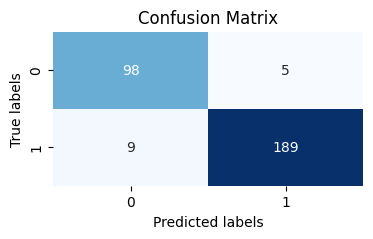

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       103
           1       0.97      0.95      0.96       198

    accuracy                           0.95       301
   macro avg       0.95      0.95      0.95       301
weighted avg       0.95      0.95      0.95       301

Deep Learning model Accuracy: 0.95


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train, y_train, X_val, y_val, X_test, y_test = X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, X_test_scaled, y_test_scaled

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Predict y data with classifier
y_predict_dl = (model.predict(X_test) > 0.5).astype("int32")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_predict_dl)

# Plot confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_predict_dl))

# Calculate and print accuracy
accuracy_dl = accuracy_score(y_test, y_predict_dl)
print("Deep Learning model Accuracy: {:.2f}".format(accuracy_dl))

# Append accuracy to accuracies list
accuracies.append(round(accuracy_dl, 2))


# ---------Comparison---------

Accuracy Comparison

**Accuracy**:
Comparing these results, we can observe that KNN ansd SVC achieves the highest accuracy (0.99), closely followed by Random Forest and XG-Boost models with accuracies of (0.98) and (0.97), followed by Deep Learning model with the accuracy of (0.95). Logistic Regression performs relatively poorly compared to other models in terms of accuracy (0.82).

From the comparison, we can see that SVC and KNN consistently achieve high precision, recall, and F1-score across both classes, indicating robust performance. Random Forest also performs well across these metrics. Logistic Regression, while having lower accuracy, exhibits lower precision and recall compared to other models. XG-Boost and the Deep Learning model also show competitive performance but with slight variations in precision, recall, and F1-score. Overall, considering all performance metrics together helps in understanding the strengths and weaknesses of each model comprehensively.

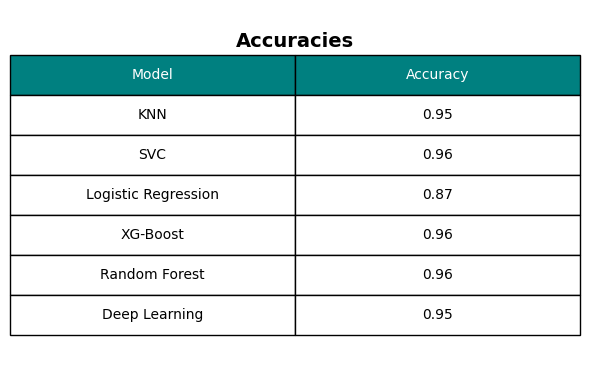

In [27]:
import matplotlib.pyplot as plt

models = ['KNN', 'SVC', 'Logistic Regression', 'XG-Boost', 'Random Forest', 'Deep Learning']

# Plotting the table
plt.figure(figsize=(6, 4))

plt.text(0.5, 0.9, 'Accuracies', horizontalalignment='center', fontsize=14, fontweight='bold', transform=plt.gca().transAxes)

cell_text = [[model, "{:.2f}".format(accuracy)] for model, accuracy in zip(models, accuracies)]
table = plt.table(cellText=cell_text, colLabels=['Model', 'Accuracy'], loc='center', cellLoc='center')

# Highlighting the first row cells with a different color
for i in range(len(models)):
    for j in range(2):
        if i == 0:
            cell = table[i, j]
            cell.set_facecolor('#008080')
            cell.set_text_props(color='white')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

plt.axis('off')

plt.tight_layout()
plt.show()


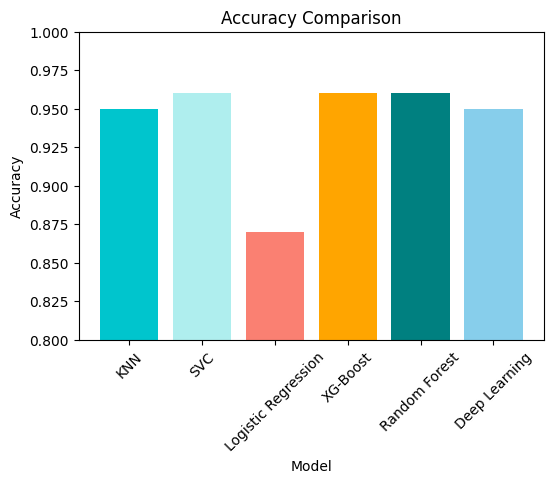

In [28]:
# Plotting the chart
color_map = {
    'KNN': '#00C5CD',
    'SVC': '#AFEEEE',
    'Logistic Regression': '#FA8072',
    'XG-Boost': '#FFA500',
    'Random Forest': '#008080',
    'Deep Learning': 'skyblue'
}


plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=[color_map[model] for model in models])
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.xticks(rotation=45)
plt.show()